
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E04_logistic_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Logistic regression exercises 

---
These are introductory exercises in Machine learning with focus in **logistic regression**

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Iris flower dataset (*)

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.

&nbsp; b) Now insert the data into a DataFrame. 

&nbsp; c) Do some EDA to get an understanding of the dataset. 

&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

&nbsp; f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

<details>

<summary>Hint</summary>

a) For DESCR key you need to print it.

f) Dataframes has a quantile method.  

</details>

<details>

<summary>Answer</summary>

b) 

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   species | specie_name   |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|----------:|:--------------|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |         0 | setosa        |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |         0 | setosa        |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |         0 | setosa        |
|  3 |                 4.6 |                3.1 |                 1.5 |                0.2 |         0 | setosa        |
|  4 |                 5   |                3.6 |                 1.4 |                0.2 |         0 | setosa        |

c) When you do describe, remove species as its statistical values are meaningless. 

|                   |    mean |      std |   min |   25% |   50% |   75% |   max |
|:------------------|--------:|---------:|------:|------:|------:|------:|------:|
| sepal length (cm) | 5.84333 | 0.828066 |   4.3 |   5.1 |  5.8  |   6.4 |   7.9 |
| sepal width (cm)  | 3.05733 | 0.435866 |   2   |   2.8 |  3    |   3.3 |   4.4 |
| petal length (cm) | 3.758   | 1.7653   |   1   |   1.6 |  4.35 |   5.1 |   6.9 |
| petal width (cm)  | 1.19933 | 0.762238 |   0.1 |   0.3 |  1.3  |   1.8 |   2.5 |


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [197]:
# 0) abc
from sklearn import datasets
import pandas as pd 
import numpy as np
iris = datasets.load_iris()
iris.data
iris.keys()

# You Coulduse this instead 
## df = datasets.load_iris(as_frame=True)

df = pd.DataFrame(data=iris.data, columns=iris.feature_names )
df["species"] = iris.target
df["species_name"] = df["species"].map(lambda y: list(iris.target_names)[y] )

df.info()
df.drop(columns="species").describe().map(lambda x: f"{x:.2f}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [192]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

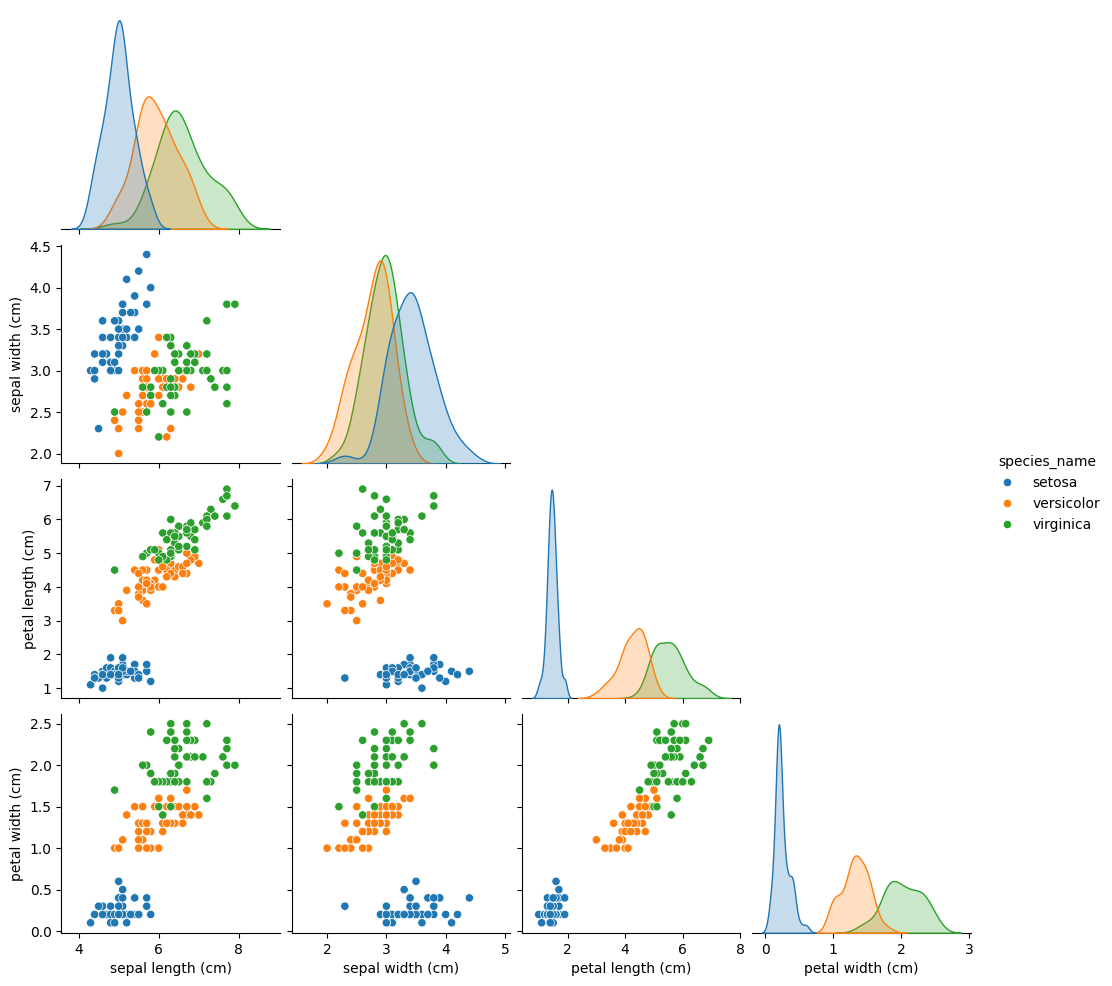

In [180]:
import seaborn as sns
# Corner Removes the Top Right Side 
# If you have discreet variable then you can set hue to it 
# dig_kind kde gives you curvy intersection
sns.pairplot(df.drop(columns=["species"]), hue="species_name", corner=True,  diag_kind="kde");

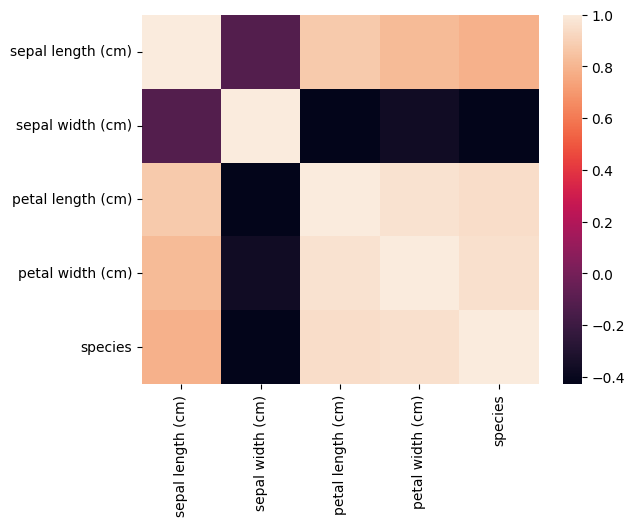

In [181]:
# 0) d

correlation_matrix = df.drop(columns=["species_name"]).corr()

plot = sns.heatmap( correlation_matrix )

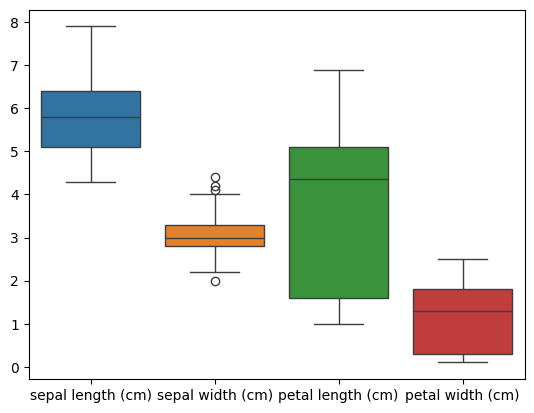

In [182]:
# 0) e

sns.boxplot( df.drop(columns=["species_name", "species"]) );


In [183]:
# 0) f

dfo = df.copy(deep=True)

# Only removes 4 values, should remove more 13
for column in dfo.drop(columns=["species_name", "species"]):
    li = dfo[column]
    Q1 = np.percentile(li, 25)
    Q3 = np.percentile(li, 75)
    IQR =  Q3-Q1
    dfo = dfo[   (dfo[column] <= Q3+(IQR)*1.5) & (dfo[column] >= Q1-(IQR)*1.5)  ]
    print( len(dfo) ) 


150
146
146
146


## 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data. 

---

In [184]:
from sklearn.model_selection import train_test_split 
X = df.drop(columns=["species_name","species"]).values 
y = df["species"].values
Xtr, Xte, ytr, yte = train_test_split( X, y, test_size=.33, random_state=42)

def scale(Xtr, Xte):
    return ( (Xtr - Xtr.mean())/Xtr.std()  , (Xte - Xtr.mean())/Xtr.std()  )
Xtr, Xte = scale(Xtr, Xte)
Xtr.mean(), Xtr.std(), Xtr.mean(), Xte.std()


(1.3322676295501878e-16, 1.0, 1.3322676295501878e-16, 1.0275969013856328)

## 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen. 

<details>

<summary>Answer</summary>

weights: 

```py
array([[-1.33033256,  1.35076961, -2.26169407, -2.07715072],
       [ 0.40073538, -0.28598722, -0.58388865, -0.7782766 ],
       [ 0.67977172, -0.81485664,  3.09503329,  3.10542664]])
```

$\ell_1$-ratio:

```py
array([0.2, 0.2, 0.2])
```


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [ ]:
from sklearn.linear_model import LogisticRegression

# Penalty="l2" is the same as no penalty, perhaps it's the default?
#model = LogisticRegression(penalty="l2")
model = LogisticRegression()
model.fit(Xtr, ytr)
model.coef_, model.intercept_

(array([[-0.65212243,  0.91247905, -2.84502128, -1.1605408 ],
        [ 0.28278993, -0.78508503,  0.0592482 , -0.69426528],
        [ 0.3693325 , -0.12739402,  2.78577308,  1.85480607]]),
 array([-0.43761372, -0.02075549,  0.45836921]))

In [186]:
from sklearn.model_selection import KFold, cross_val_score

# solver='liblinear' gives you a result that is very close to having no solver
# I found C during the hyper parameter tuning
model = LogisticRegression( C=10, random_state=42) #or other solver

# n_splits: The number of folds (k).
# shuffle: Whether to shuffle the data before splitting into folds. This is generally recommended to avoid bias.
# random_state: Controls the shuffling for reproducibility.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, Xtr, ytr, cv=kf, scoring='accuracy')
print(f"Scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

Scores: [0.95 0.9  0.95 0.9  1.  ]
Mean score: 0.9399999999999998
Standard deviation: 0.037416573867739396


In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  # Example model
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(Xtr, ytr)

print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

accuracy = grid.best_estimator_.score(Xte, yte)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.450 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.950 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.850 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

## 3. Evaluate model (*)

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction. 

&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

&nbsp; c) Print a classification report 

<details>

<summary>Answer</summary>


b) 

<img src = "../assets/confusion_matrix_iris.png" height=300>



c) 

Classification report 

```py
          precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46
```






</details>

---

In [191]:
# 3) a
model = LogisticRegression()
model.fit(Xtr, ytr)
yte_hat = model.predict_proba(Xte[:10])
yte_hat = np.array([ np.argmax(row) for row in yte_hat])
print( yte_hat, yte[:10] )

[1 0 2 1 1 0 1 2 1 1] [1 0 2 1 1 0 1 2 1 1]


Accuracy: 1.000


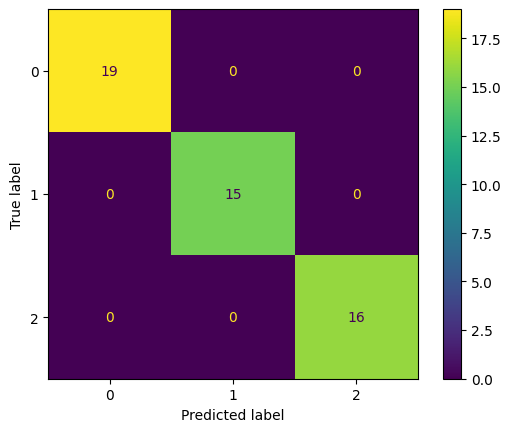

In [ ]:
# 3) b
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

yte_hat = model.predict_proba(Xte)
yte_hat = np.array([ np.argmax(row) for row in yte_hat])

acc = accuracy_score(yte, yte_hat)
print(f"Accuracy: {acc:.3f}")

cm = confusion_matrix(yte, yte_hat, labels = model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot();

# (?) Should have gotten one wrong, but this can be because I messed up 
# the removing values thing.

In [ ]:
# 3) c
print(classification_report(yte, yte_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## 4. $k$-folded cross-validation for evaluation (**)

To be more robust in reporting the results, you should report the results as $\mu_{score}$, i.e. average score through a k-folded cross-validation. Report the score for precision, recall, f1-score for each label and overall accuracy. Do the cross-validation manually using for statement. 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#iris = datasets.load_iris() 
#X, y = iris.data, iris.target
Xtr, Xte, ytr, yte 

# Initialize Logistic Regression model
model = LogisticRegression(C=10, solver='liblinear', random_state=42)

# Initialize KFold cross-validation, n_splits = number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store scores for each fold
precision_scores = {label: [] for label in np.unique(y)}
recall_scores = {label: [] for label in np.unique(y)}
f1_scores = {label: [] for label in np.unique(y)}
accuracy_scores = []

# Perform k-fold cross-validation manually
for train_index, test_index in kf.split(Xtr):
    X_train, X_test = Xtr[train_index], Xtr[test_index]
    y_train, y_test = ytr[train_index], ytr[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    yte_hat = model.predict(X_test)

    # Calculate scores for each label
    for label in np.unique(y):
        precision_scores[label].append(precision_score(y_test, yte_hat, labels=[label], average='micro'))
        recall_scores[label].append(recall_score(y_test, yte_hat, labels=[label], average='micro'))
        f1_scores[label].append(f1_score(y_test, yte_hat, labels=[label], average='micro'))

    # Calculate overall accuracy
    accuracy_scores.append(accuracy_score(y_test, yte_hat))


 # Calculate average scores across all folds
avg_precision_scores = {label: np.mean(scores) for label, scores in precision_scores.items()}
avg_recall_scores = {label: np.mean(scores) for label, scores in recall_scores.items()}
avg_f1_scores = {label: np.mean(scores) for label, scores in f1_scores.items()}
avg_accuracy = np.mean(accuracy_scores)

# Print the results
print("Average Precision Scores:")
for label, score in avg_precision_scores.items():
    print(f"Label {label}: {score:.4f}")

print("\nAverage Recall Scores:")
for label, score in avg_recall_scores.items():
    print(f"Label {label}: {score:.4f}")

print("\nAverage F1 Scores:")
for label, score in avg_f1_scores.items():
    print(f"Label {label}: {score:.4f}")

print(f"\nAverage Accuracy: {avg_accuracy:.4f}")


Average Precision Scores:
Label 0: 1.0000
Label 1: 0.9444
Label 2: 0.8667

Average Recall Scores:
Label 0: 1.0000
Label 1: 0.9064
Label 2: 0.9278

Average F1 Scores:
Label 0: 1.0000
Label 1: 0.9215
Label 2: 0.8929

Average Accuracy: 0.9400


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---